<a href="https://colab.research.google.com/github/CamiloE/Proyectos-Personales/blob/master/Precios_de_las_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por medio de este dataset se va a crear un modelo en el que se logre predecir el precio de unas casas a partir de datos  tomados como el suburbio, la dirección, el número de habitaciones, de baños, el codigo postal, tamaño del terreno, area construida, la region, entre otras

In [1]:
#Importar librerias importantes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Importar base de datos
dataframe =  pd.read_csv("https://raw.githubusercontent.com/StephanieStallworth/Exploratory_Data_Analysis_Visualization_Python/master/Melbourne_housing_extra_data.csv")
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019


In [3]:
dataframe.shape

(17407, 21)

Se puede ver que en el dataset hay 21 caracteristicas y 17407 muestras. \
Lo que hay que hacer es ver que tipo de dato es cada característica.

In [4]:
dataframe.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode           int64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
dtype: object

Se puede ver qu existen 8 características categoricas y el resto son numéricas. Lo siguente es mirar si se encuentran valores nulos en las columnas

In [5]:
dataframe.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname       False
Propertycount    False
dtype: bool

Como se sabe que hay valores nulos en algunas columnas con valores nulos, lo que sigue es mirar cuantos hay en cada columna para poder proceder con la estrategia.

In [6]:
dataframe.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             3882
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          3782
Bathroom          3782
Car               3782
Landsize          3804
BuildingArea     10084
YearBuilt         8978
CouncilArea       3806
Lattitude         3670
Longtitude        3670
Regionname           0
Propertycount        0
dtype: int64

Como la base de datos tiene demasiadas muestras, eliminando las filas con valores nulos se seguira teniendo una buena  cantidad de datos para hacer el train y el test

In [7]:
dataframe.dropna(how='any',inplace=True)
dataframe.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [8]:
dataframe.shape#Cantidad de datos y caracteristicas despues de  eliminar las muestras con valores nulos

(5382, 21)

Para que un modelo de regresion lineal tenga un mejor entrenamiento, lo mejor es conocer las variables si tienen distribución normal, incluyendo la variable objetivo.

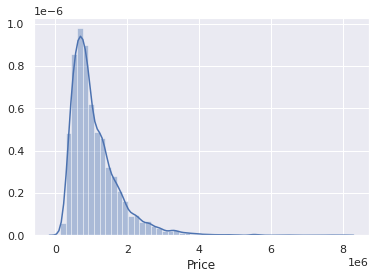

In [9]:
sns.distplot(dataframe['Price'],color='b')

Como la variable precio no esta normalizada se le va a aplicar escala logaritmica para conseguir el obetivo

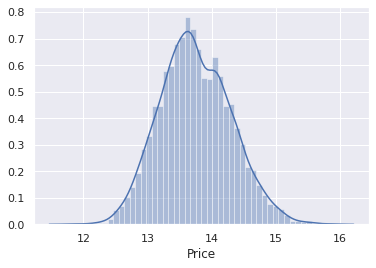

In [10]:
dataframe['Price']=np.log(dataframe['Price'])
sns.distplot(dataframe['Price'],color='b')

Como aun existen variables cualitativas y no se pueden escoger todas, por medio de las graficas de violinplot se puede conocer la relación y la influencia de estas en el precio

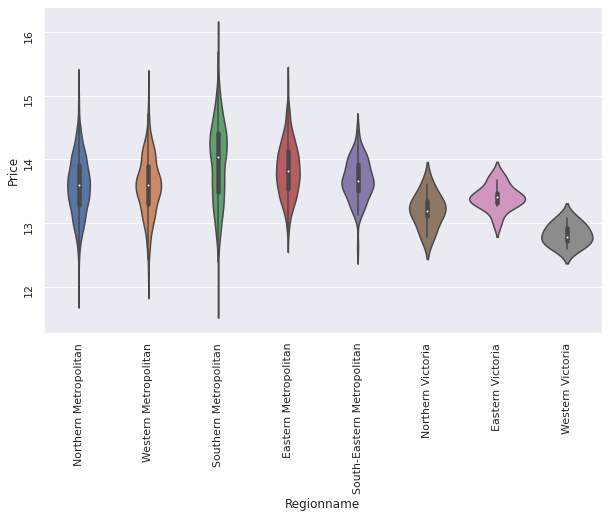

In [11]:
#Conocer la relacion existente entre la region y el precio
fig, ax=plt.subplots(figsize=(10,6))
sns.violinplot(data=dataframe,x='Regionname',y='Price',ax=ax)
ax.tick_params(labelrotation=90)

Se puede ver que la region influye en el precio porque en cada concentración de datos tiene un valor de precio

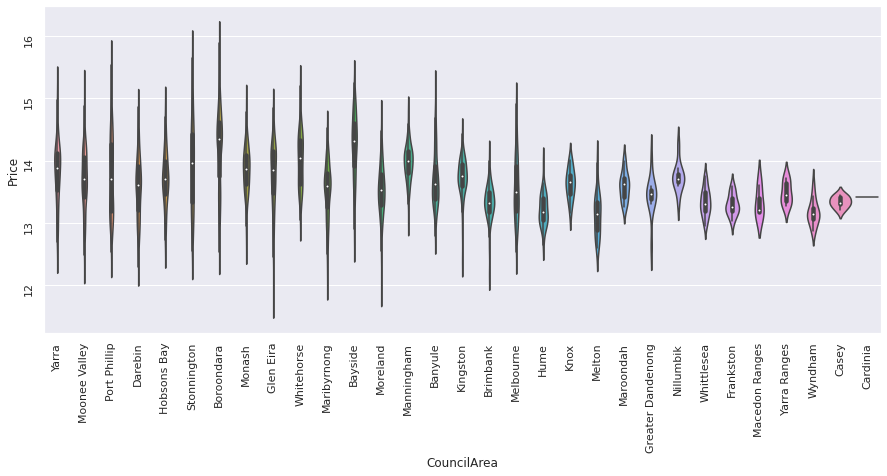

In [12]:
fig, ax=plt.subplots(figsize=(15,6))
sns.violinplot(data=dataframe,x='CouncilArea',y='Price',ax=ax)#Conocer la relacion existente entre El council area y el precio
ax.tick_params(labelrotation=90)

La variable CouncilArea como se puede ver amvien tiene influencia

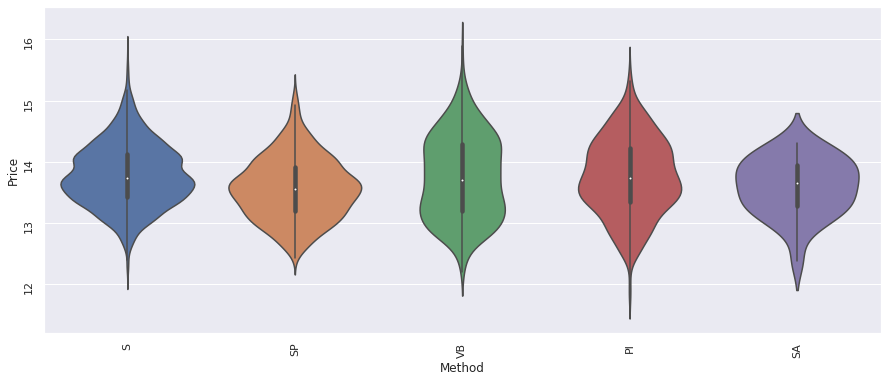

In [13]:
fig, ax=plt.subplots(figsize=(15,6))
sns.violinplot(data=dataframe,x='Method',y='Price',ax=ax)#Conocer la relacion existente entre El method y el precio
ax.tick_params(labelrotation=90)

Esta variable anterior se podria descartar porque sus concentraciones con respecto a los precios son parecidas

In [14]:
'''Esta variable se puede eliminar porque tiene demasiadas categorias, lo que complicaria su codificacion y además es un tipo de variable parecida a la region'''
dataframe['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Maidstone', 'Malvern', 

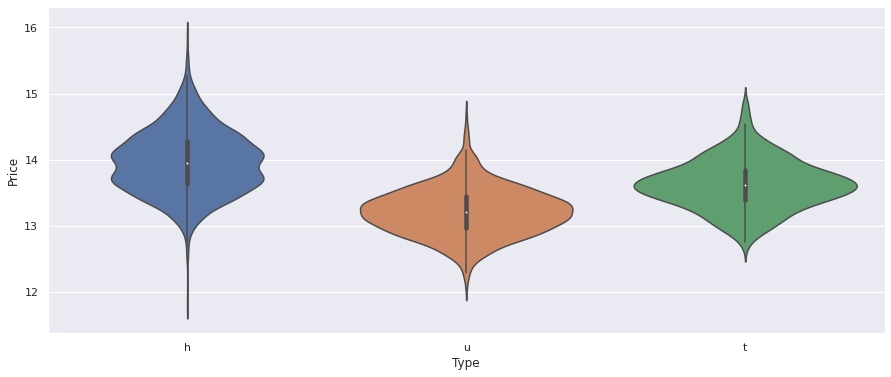

In [15]:
fig, ax=plt.subplots(figsize=(15,6))
sns.violinplot(data=dataframe,x='Type',y='Price',ax=ax)#Conocer la relacion existente entre El Type y el precio

En la anterior casa se puede ver que el tipo de casa influye en el precio

In [16]:
dataframe['SellerG'].unique()

array(['Biggin', 'Nelson', 'Jellis', 'LITTLE', 'Kay', 'Collins',
       'Marshall', 'Brad', 'Maddison', 'Barry', 'Rendina', 'Harcourts',
       'hockingstuart', 'Buxton', 'Greg', 'RT', 'Cayzer', 'Brace',
       'Miles', 'Love', 'McGrath', 'Barlow', 'Village', 'Burnham',
       'Williams', 'Compton', 'FN', 'Jas', 'Raine&Horne', 'Hunter',
       'Hodges', 'Raine', 'Alexkarbon', 'McDonald', 'Stockdale',
       'Fletchers', 'Noel', 'Tim', 'Purplebricks', 'Ray', 'Moonee',
       'Edward', 'Gary', 'Chisholm', 'Philip', 'RW', 'Ascend',
       'Christopher', 'Mandy', 'Fletchers/One', 'Assisi', 'One',
       'Woodards', 'Bayside', 'C21', 'First', 'Beller', 'Matthew', 'Nick',
       'Lindellas', 'Allens', 'Sweeney', 'Bells', 'Trimson', 'YPA', 'GL',
       "Tiernan's", 'HAR', 'Walshe', 'Dingle', 'Chambers', 'Peter',
       'Grantham', 'hockingstuart/Advantage', "O'Donoghues", 'Ross',
       'Weast', 'Century', 'Kelly', 'Property', 'Thomson',
       "Private/Tiernan's", 'Australian', 'Anderson', '

El caso de la variable SellerG es parecido al del Suburbio 

## **Variables Numéricas**

Ahora lo que corresponde hacer con las variables numéricas es hallar la correlación existente entre ellas y asi poder escoger las más correlacionadas  con el precio y al mismo tiempo escoger variables independientes que no estan tan correlacionadas.

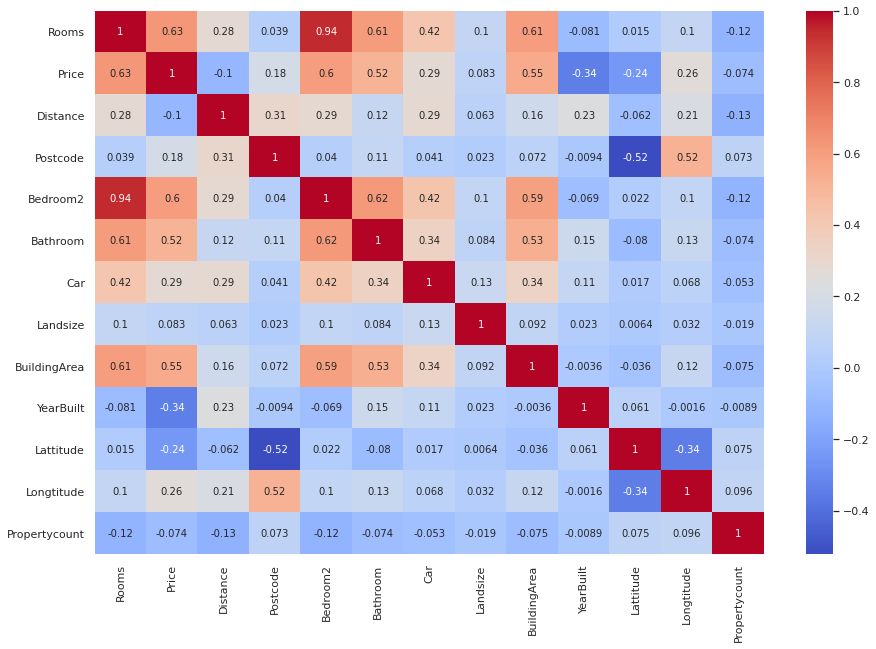

In [17]:
corr=dataframe.corr()
fig, ax= plt.subplots(figsize=(15,10))#Hallar correlacion entre las variables numericas
sns.heatmap(data=corr,annot=True,cmap='coolwarm')

Segun el mapa de calor, la variable más correlacionada con el precio es el número de habitaciones. La variable Bedroom2 esta altamente correlacionada con el número de cuartos entonces será eliminada.

De acuerdo a las graficas de violin se eliminaran ciertas columnas y las otras categoricas que queden seran codíficadas con labelEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataframe['Regionname']=le.fit_transform(dataframe['Regionname'])
dataframe['Type']=le.fit_transform(dataframe['Type'])
dataframe['CouncilArea']=le.fit_transform(dataframe['CouncilArea'])#Transforma las variables categoricas
dataframe.drop(axis='columns',columns=['Suburb','Address','Propertycount','Landsize','Method','SellerG','Date','Bedroom2'],inplace=True)#Eliminar columnas que no se necesitan
dataframe.head()

,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
2,2,0,13.849912,2.5,3067,1.0,0.0,79.0,1900.0,29,-37.8079,144.9934,2
4,3,0,14.197366,2.5,3067,2.0,0.0,150.0,1900.0,29,-37.8093,144.9944,2
6,4,0,14.285514,2.5,3067,1.0,2.0,142.0,2014.0,29,-37.8072,144.9941,2
11,3,0,14.444652,2.5,3067,2.0,0.0,210.0,1910.0,29,-37.8024,144.9993,2
14,2,0,14.307765,2.5,3067,1.0,2.0,107.0,1890.0,29,-37.8060,144.9954,2


In [19]:
datos= dataframe.iloc[0:300]#Tomar solo 300 muestras para el train y el test
datos.head()

,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
2,2,0,13.849912,2.5,3067,1.0,0.0,79.0,1900.0,29,-37.8079,144.9934,2
4,3,0,14.197366,2.5,3067,2.0,0.0,150.0,1900.0,29,-37.8093,144.9944,2
6,4,0,14.285514,2.5,3067,1.0,2.0,142.0,2014.0,29,-37.8072,144.9941,2
11,3,0,14.444652,2.5,3067,2.0,0.0,210.0,1910.0,29,-37.8024,144.9993,2
14,2,0,14.307765,2.5,3067,1.0,2.0,107.0,1890.0,29,-37.8060,144.9954,2


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
kf=KFold(n_splits=5,shuffle=True,random_state=42)
X=datos.drop(axis='columns',columns=['Price'])#Separar las caracteristicas de la variable objetivo
y=datos[['Price']]#Separar la variable objetivo
for train_index, test_index in kf.split(X):
  X_train, X_test=X.values[train_index],X.values[test_index] 
  y_train, y_test= y.values[train_index], y.values[test_index] #Separacion de los datos de entrenamiento y test

In [21]:
X_train.shape

(240, 12)

In [22]:
from sklearn.pipeline import Pipeline
model=Pipeline([('ss',StandardScaler()),
                ('lr',LinearRegression())])#Modelo que normaliza los datos y aplica regression lineal

In [23]:
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [24]:
X_test.shape, y_test.shape

((60, 12), (60, 1))

In [25]:
print(f'El puntae r2 obtenido es{model.score(X_test,y_test):.3f}')

El puntae r2 obtenido es0.680


* **Coeficiente de determinación**

\begin{equation}
R^2 = 1 - \frac{\sum_i  (y_i - \hat y_i)^2}{\sum_i  (y_i - \overline y)^2}
\end{equation}

El score r2 como se puede ver en la ecuación anterior esta relacionado con la diferencia entre los valores reales del precio y los predecidos por el modelo. En los modelos cientificos habria que mejorar este puntaje pero en este contexto relacionado con un problema de mercado se puede considerar bueno porque en la base de datos no se tienen en cuenta agentes externos como por ejemplo las crisis económicas.

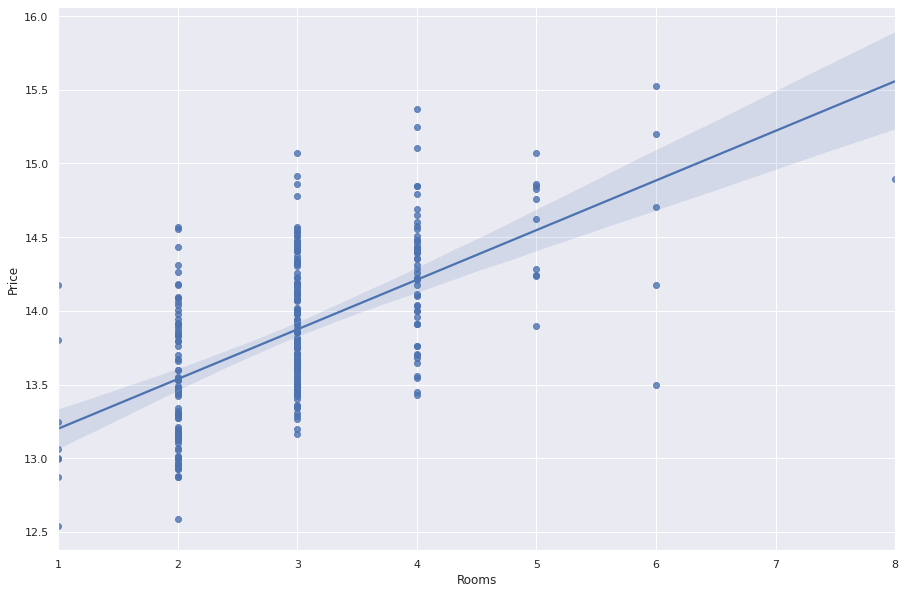

In [26]:
fig, ax= plt.subplots(figsize=(15,10))#Hallar correlacion entre las variables numericas
sns.regplot(data=datos,x='Rooms',y='Price',ax=ax)

Como la distribucion de los datos es la mostrada en el grafico de encima, hacer un modelo polinomial no seria necesario.

In [27]:
model['lr'].intercept_, model['lr'].coef_#Intercepto y coeficientes obtenidos

(array([13.84858542]),
 array([[ 0.12755369, -0.17119966, -0.11097445,  0.13130779,  0.04455555,
          0.03049703,  0.09618949, -0.08936693, -0.07176406, -0.00186659,
          0.05693176, -0.01830522]]))

In [28]:
from sklearn import metrics
y_pred=model.predict(X_test)
error=metrics.mean_squared_error(y_test,y_pred)
print(f'El error cuadratico medio obtenido es {error:.3f}')

El error cuadratico medio obtenido es 0.084


\begin{equation}
MSE = {\sum_i  (y_i - \overline y)^2}
\end{equation}

La ecuación anterior corresponde al error cuadratico medio hallado arriba y se puede ver que es muy bajo

## Modelo aplicando gradiente estocastico SGD

Para poder optimizar la funcion de costo con la que se obtienen los coeficientes del modelo, se aplica gradiente estocastico descendente. En este caso se realizara una busqueda aleatoria para ver con cuales parámetros se obtiene mejor puntaje.

In [29]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(learning_rate='constant')
modelo3=Pipeline([('ss',StandardScaler()),
                  ('sgd', sgd)])

In [30]:
modelo3.get_params()#Parametros del modelo para  aplicar 

{'memory': None,
 'sgd': SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.01, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1000,
              n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False),
 'sgd__alpha': 0.0001,
 'sgd__average': False,
 'sgd__early_stopping': False,
 'sgd__epsilon': 0.1,
 'sgd__eta0': 0.01,
 'sgd__fit_intercept': True,
 'sgd__l1_ratio': 0.15,
 'sgd__learning_rate': 'constant',
 'sgd__loss': 'squared_loss',
 'sgd__max_iter': 1000,
 'sgd__n_iter_no_change': 5,
 'sgd__penalty': 'l2',
 'sgd__power_t': 0.25,
 'sgd__random_state': None,
 'sgd__shuffle': True,
 'sgd__tol': 0.001,
 'sgd__validation_fraction': 0.1,
 'sgd__verbose': 0,
 'sgd__warm_start': False,
 'ss': StandardScaler(copy=True, with_mean=True, with_std=True),
 'ss__copy': True,


In [31]:
from sklearn.model_selection import RandomizedSearchCV
alfas=np.linspace(0.0001,0.7,20)
etas=np.linspace(0.001,1,20)
epsilons=np.linspace(0.01,1,20)
dicc={'sgd__alpha':alfas,'sgd__eta0':etas,'sgd__epsilon':epsilons}
clf=RandomizedSearchCV(modelo3,param_distributions=dicc,cv=5,random_state=42,n_iter=15)

In [32]:
clf.fit(X,y);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [33]:
clf.best_params_

{'sgd__alpha': 0.07377368421052631,
 'sgd__epsilon': 0.16631578947368422,
 'sgd__eta0': 0.001}

In [34]:
clf.best_score_

0.6941209590767352

El puntaje mostrado anteriormente es mejor que el obtenido al modelo lineal y además se obtiene ganancia en cuanto al costo computacional por ser una busqueda aleatoria de parametros.

## **Métodos de ensamble**

In [39]:
from sklearn.ensemble import BaggingRegressor
modelo4=BaggingRegressor(base_estimator=LinearRegression(),n_estimators=10,random_state=0)

In [40]:
modelo4.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [41]:
modelo4.score(X_test,y_test)

0.6613312959884808